In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn as sns
import seaborn as sns

plt.rc("font", family="Noto Sans KR", size=13) 
plt.rc("axes", unicode_minus=False)
plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

In [2]:
train = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_train.csv")
test = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_test.csv")
submission = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\submission.csv")

In [3]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000
2,7,L. Suárez,31,south america,2021,ST,right,5,91,91,3,80000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000


#### describe메소드

In [4]:
# describe매소드는 각종 통계량을 요약해준다.
#{count:총 양, mean:평균, std: 표준편차, 25%/50%/75%: 100분위이 각지점 값 min/max:최댓값,최솟값}
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


#### info메소드
FiFA 데이터 셋에 대한 컬럼이름 데이터 갯수 데이터 타입 정보확인

In [5]:
train.info

<bound method DataFrame.info of          id                name  age      continent contract_until position  \
0         0            L. Messi   31  south america           2021       ST   
1         3              De Gea   27         europe           2020       GK   
2         7           L. Suárez   31  south america           2021       ST   
3         8        Sergio Ramos   32         europe           2020       DF   
4         9            J. Oblak   25         europe           2021       GK   
...     ...                 ...  ...            ...            ...      ...   
8927  16925          S. Adewusi   18         africa           2019       MF   
8928  16936           C. Ehlich   19         europe           2020       DF   
8929  16941          N. Fuentes   18  south america           2021       DF   
8930  16942            J. Milli   18         europe           2021       GK   
8931  16948  N. Christoffersson   19         europe           2020       ST   

     prefer_foot  r

전체 데이터 개수 8932개 속성 12개
단순 순번 id와 클래스로 쓰 value를 제외하면 10개의 독립변수
클래스는 value(이적료)
결측값(빈칸)은 없다.
continet(국적)은 문자열이므로 숫자형으로 바꿔서 진행할 예정

### 데이터 전처리
1.id와 name은 필요없는 속성이기 때문에 없앤다.
#### 속성
2.범주형 값(문자열 타입): continent(국적),contract_until(계약기간),position(포지 션),prefer_foot(주발)\
3.수치형 값(정수형): age(나이),reputation(인지도),stat_overall(선수 능력치),stat_potential(발전 가능성),stat_skill_moves(개인기 능력치)
#### 클래스
4. value(이적료)

### 그래프 시각화
FIFA 데이터 셋의 범주형 자료형에 대한 데이터 값들을 그래프로 시각화 정보확인\
1. fig = plt.figure() : ax 없는 빈 figure 생성 (후에 ax를 추가해줘야함)

2. fig, ax = plt.subplots() : 하나의 ax 만을 가지는 하나의 figure 생성

3. fig, axes = plt.subplots(2,2) : 4개(2*2)이 ax들을 가지는 하나의 figure 생성

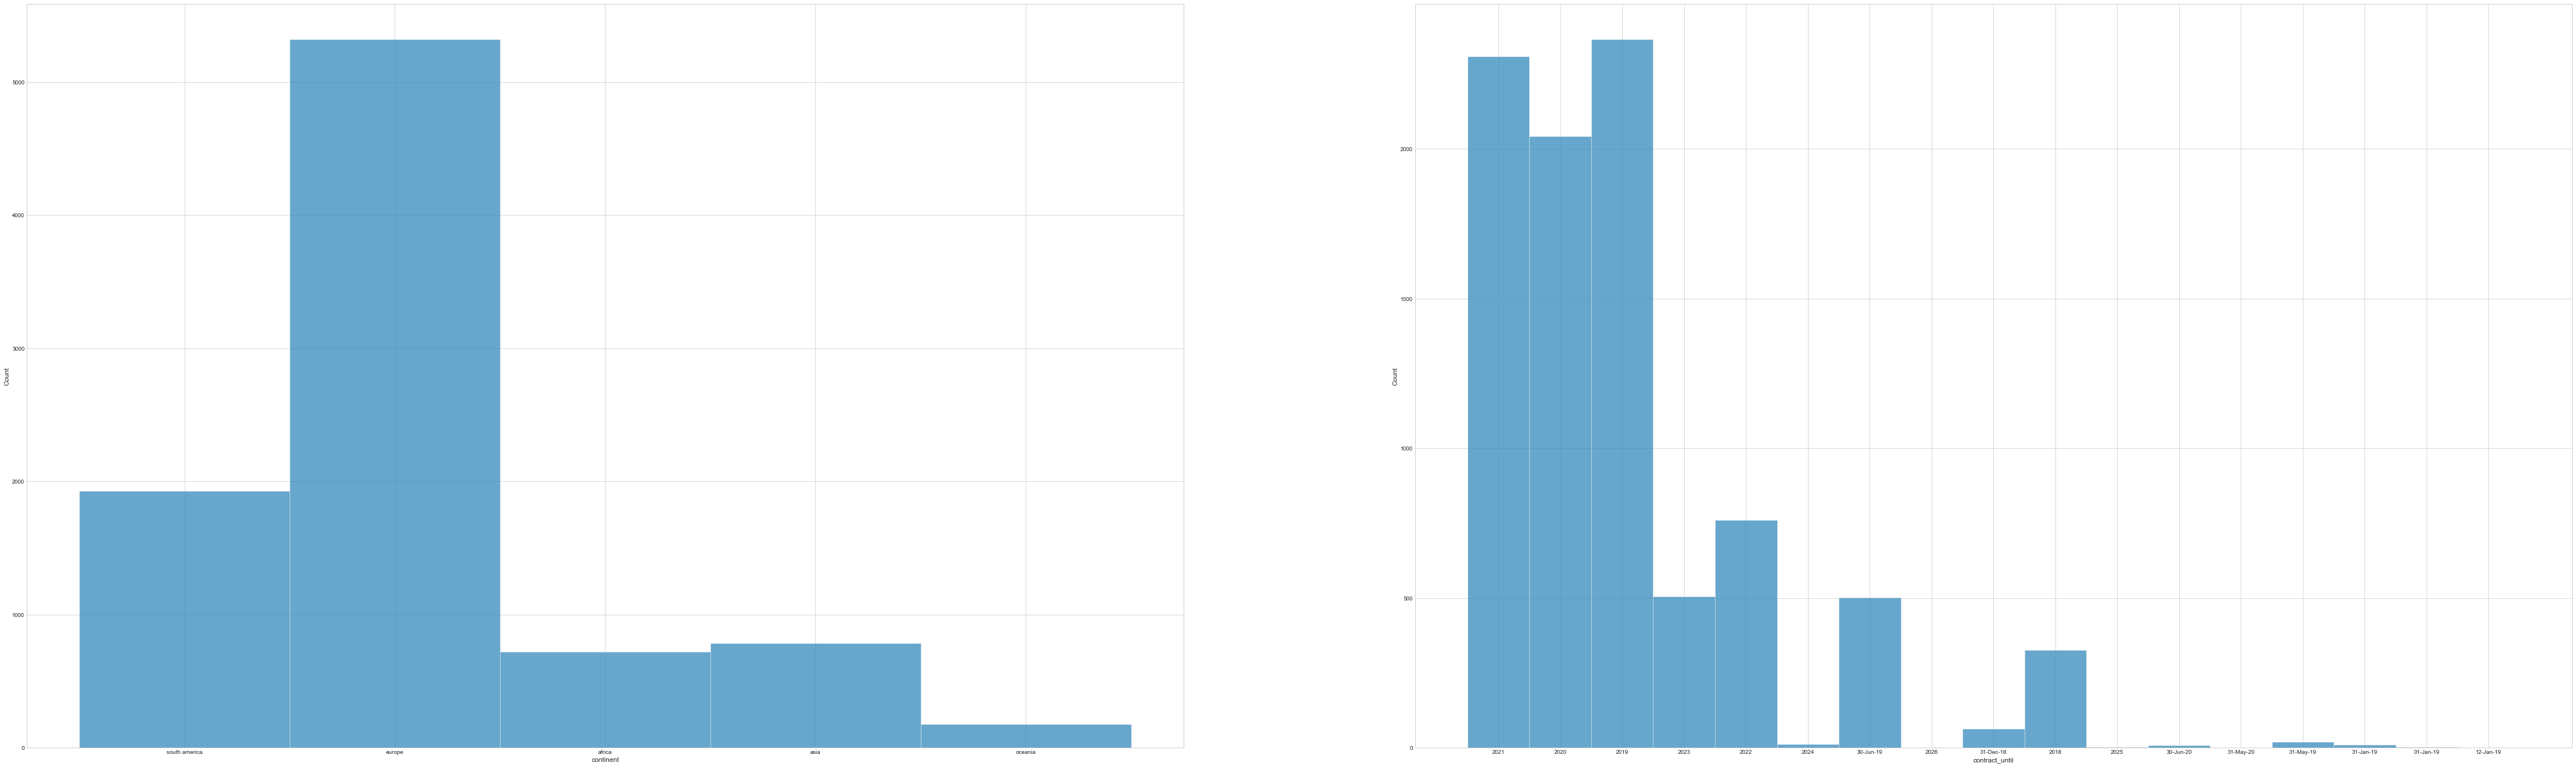

In [6]:
f, ax = plt.subplots(1,2, figsize=(80,24))#  1열의 4행을 가진 40,6사이즈의 표를 생성한다.
ax = ax.flatten() # ???
col_list= ["continent","contract_until"]
for i in range(len(col_list)):
    sns.histplot(data=train,x=col_list[i], ax=ax[i])
plt.show()
# 너무 작아!!!!!!! 다른 그래프로 변경

[Text(0.5, 1.0, 'log_value_logscale_boxflot')]

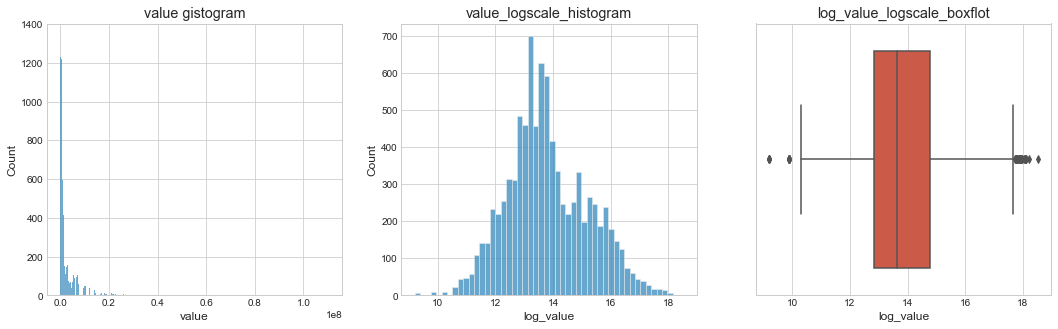

In [7]:
f , axes = plt.subplots(1,3)
axes = axes.flatten()
f.set_size_inches(18,5)
train["log_value"] = np.log(train["value"])
# 이적료에 log
sns.histplot(x="value", data=train, ax=axes[0])
axes[0].set(title = "value gistogram")
sns.histplot(x="log_value", data=train, ax=axes[1])
axes[1].set(title = "value_logscale_histogram")
sns.boxplot(x="log_value", data=train, ax=axes[2])
axes[2].set(title = "log_value_logscale_boxflot")

-첫번째 그래프를 볼때 이적료의 편차가 너무 큼\
-분석을 진행할 때 log_scale의 value도 target(class??)으로 시도 하는 것도 의미 있을듯 함\
-log scale 임에도 불구하고 이상치가 있음. log scale 기준 10~18데이터만 사용

### 나이별 이적료

[Text(0.5, 1.0, 'value_for_age'), Text(0.5, 0, 'age'), Text(0, 0.5, 'value')]

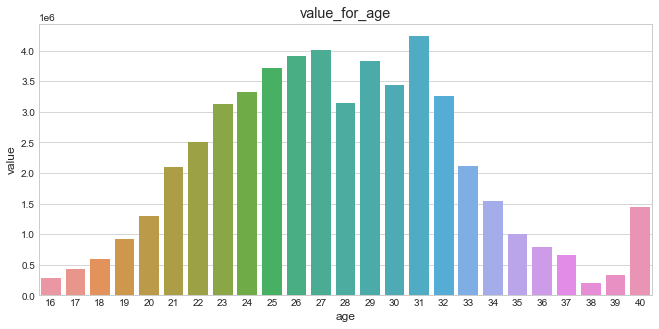

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn as sns
import seaborn as sns
f , ax = plt.subplots()
f.set_size_inches(11,5)
# 나이별 평균 이적료
group_age_value = train.groupby("age")["value"].mean()
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="age", y="value",data=group_age_value)
# 설정
ax.set(title='value_for_age',xlabel="age",ylabel="value")

-표를 보았을 때 나이가 너무 적거나 너무 많으면 이적료가 싸다.\
-연차가 좀 쌓인 20대 초중반의 이적료가 비싸다.

[Text(0.5, 1.0, 'log_value_mean_for_age'),
 Text(0.5, 0, 'age'),
 Text(0, 0.5, 'log_value')]

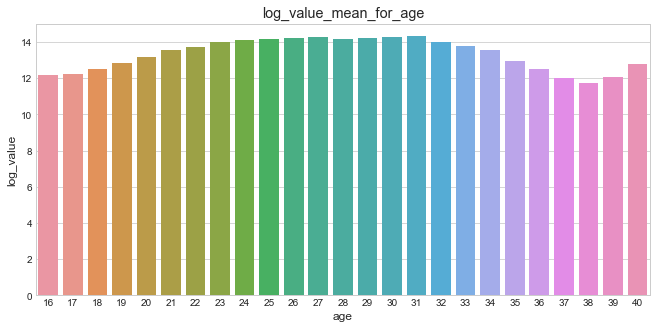

In [9]:
f, ax = plt.subplots()
f.set_size_inches(11,5)

# 나이별 평균 이적료_로그스게일
group_age_logvalue = train.groupby("age")["log_value"].mean()
group_age_logvalue = group_age_logvalue.reset_index()

# 나이별 평균 이적료_로그스케일 막대 그래프
sns.barplot(x="age",y='log_value',data=group_age_logvalue)

# 설정
ax.set(title ='log_value_mean_for_age',xlabel='age',ylabel='log_value')

-로그스케일로 했을떄 편차가 훨씬 적다.

### 현재능력치, 잠재적 능력치
현재 능력치 히스토그램\
현재 능려치 별 평균 log이적료 막대그래프\
np.ptp = 최댓값과 최솟값의 차

stat_overall_range: 47


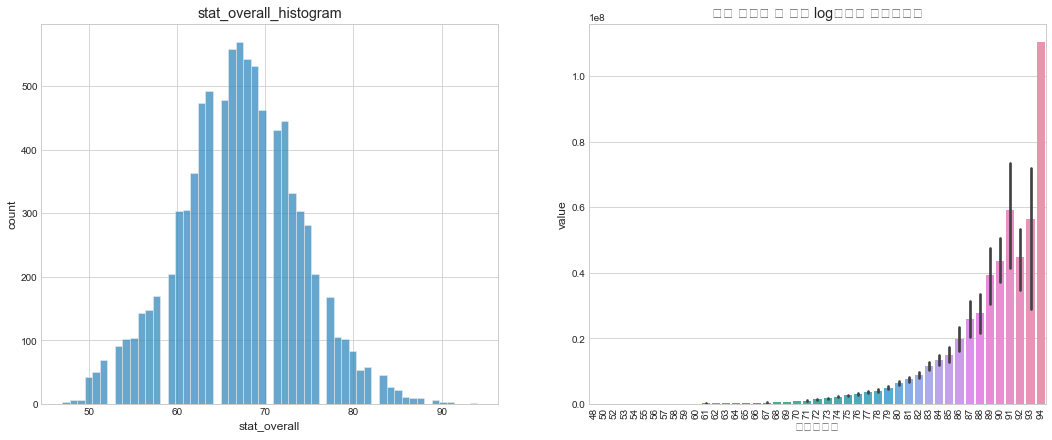

In [10]:
f , axes = plt.subplots(1,2) # 그래프 개수
axes = axes.flatten() # 1차원 배열로 바꾸기
f.set_size_inches(18,7) # 그래프 크기
print("stat_overall_range:",np.ptp(train["stat_overall"])) # 범위

sns.histplot(x="stat_overall", data=train,ax=axes[0])
axes[0].set(title = "stat_overall_histogram",xlabel="stat_overall",ylabel="count")
sns.barplot(x="stat_potential", y="value", data=train,ax=axes[1])
axes[1].set(title = "현재 능력치 별 평균 log이적료 막대그래프",
      xlabel="현재능력치",
      ylabel="value")
axes[1].tick_params(axis="x", labelrotation=90)
import warnings
warnings.filterwarnings(action='ignore')

stat_overall_range: 47


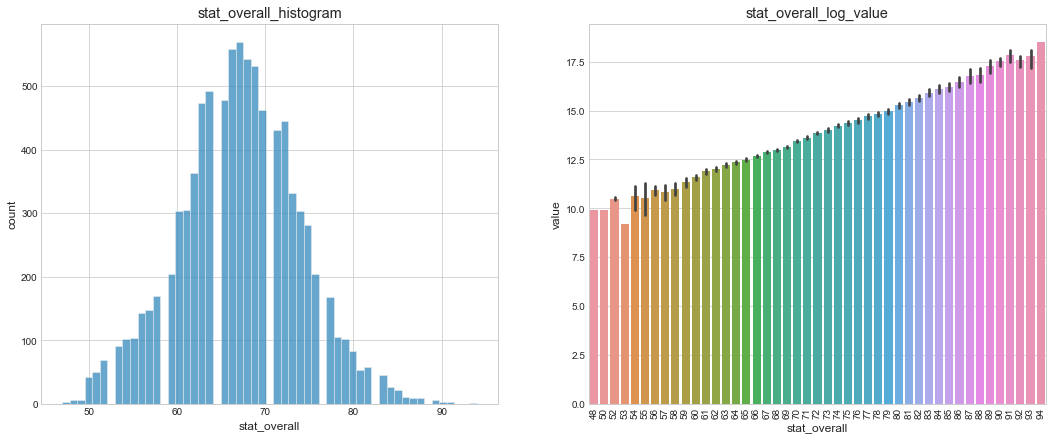

In [11]:
f , axes = plt.subplots(1,2) # 그래프 개수
axes = axes.flatten() # 1차원 배열로 바꾸기
f.set_size_inches(18,7) # 그래프 크기
print("stat_overall_range:",np.ptp(train["stat_overall"])) # 범위

sns.histplot(x="stat_overall", data=train,ax=axes[0])
axes[0].set(title = "stat_overall_histogram",xlabel="stat_overall",ylabel="count")
sns.barplot(x="stat_potential", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "stat_overall_log_value",
      xlabel="stat_overall",
      ylabel="value")
axes[1].tick_params(axis="x", labelrotation=90)
import warnings
warnings.filterwarnings(action='ignore')

stat_potential의 범위 :  46


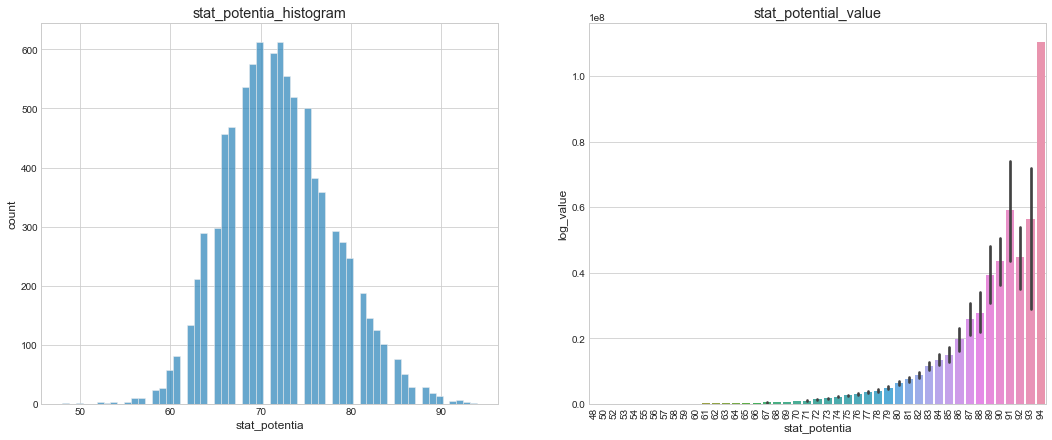

In [12]:
# 잠재적 능력치 히스토그램
# 잠재적 능력치 별 평균 log이적료 막대그래프

f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_potential의 범위 : " ,np.ptp(train["stat_potential"])) # 범위

# 히스토그램
sns.histplot(x="stat_potential", data=train, ax=axes[0])
axes[0].set(title = "stat_potentia_histogram",
      xlabel="stat_potentia",
      ylabel="count")

sns.barplot(x="stat_potential", y="value", data=train, ax=axes[1])
axes[1].set(title = "stat_potential_value",
      xlabel="stat_potentia",
      ylabel="log_value")
axes[1].tick_params(axis="x", labelrotation=90)

stat_potential의 범위 :  46


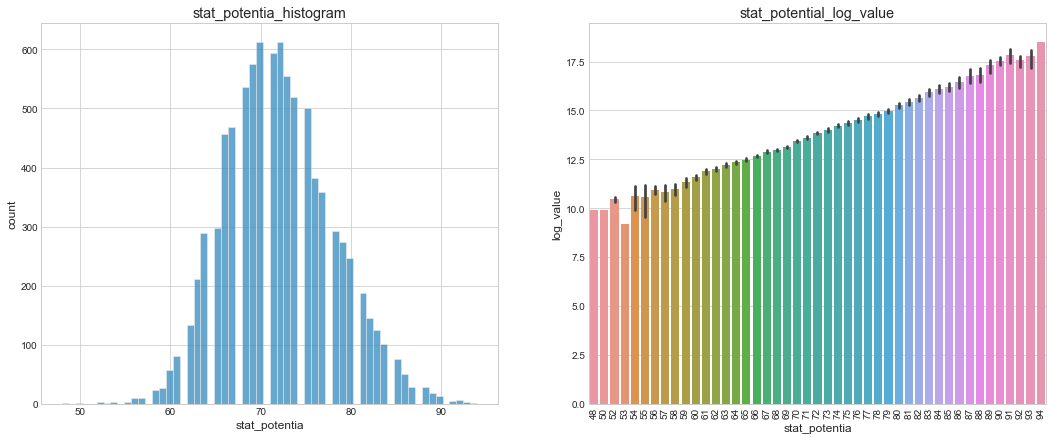

In [13]:
# 잠재적 능력치 히스토그램
# 잠재적 능력치 별 평균 log이적료 막대그래프

f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_potential의 범위 : " ,np.ptp(train["stat_potential"])) # 범위

# 히스토그램
sns.histplot(x="stat_potential", data=train, ax=axes[0])
axes[0].set(title = "stat_potentia_histogram",
      xlabel="stat_potentia",
      ylabel="count")

sns.barplot(x="stat_potential", y="log_value", data=train, ax=axes[1])
axes[1].set(title = "stat_potential_log_value",
      xlabel="stat_potentia",
      ylabel="log_value")
axes[1].tick_params(axis="x", labelrotation=90)

In [14]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000,18.520526
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000,18.092177
2,7,L. Suárez,31,south america,2021,ST,right,5,91,91,3,80000000,18.197537
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000,17.747336
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000,18.035018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1,48,63,3,60000,11.002100
8928,16936,C. Ehlich,19,europe,2020,DF,right,1,47,59,2,40000,10.596635
8929,16941,N. Fuentes,18,south america,2021,DF,right,1,47,64,2,50000,10.819778
8930,16942,J. Milli,18,europe,2021,GK,right,1,47,65,1,50000,10.819778


{'whiskers': [<matplotlib.lines.Line2D at 0x19d99a53a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19d99a782b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d99a61d60>],
 'medians': [<matplotlib.lines.Line2D at 0x19d99a78850>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d99a78b20>],
 'means': []}

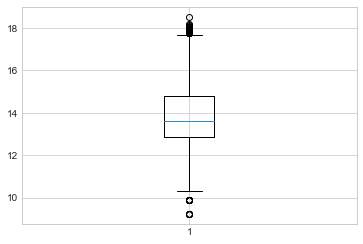

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
dataset = train.values
test_dataset = test.values
train["log_value"] = np.log(train["value"])
Y = dataset[:,12].astype(float)
plt.boxplot(Y)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [38]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
dataset = train.values
cnte = train.iloc[:,3]
e = LabelEncoder()
e.fit(cnte)
Y = e.transform(cnte)

In [39]:
Y= pd.DataFrame(Y)

In [40]:
Y

,0
0,4
1,2
2,4
3,2
4,2
...,...
8927,0
8928,2
8929,4
8930,2


In [33]:
po = train.iloc[:,5]
e.fit(po)
Y1= e.transform(po)

In [41]:
Y1= pd.DataFrame(Y1)
Y1

,0
0,3
1,1
2,3
3,0
4,1
...,...
8927,2
8928,0
8929,0
8930,1


In [35]:
fo = train.iloc[:,6]
e.fit(fo)
Y2= e.transform(fo)

In [42]:
Y2= pd.DataFrame(Y2)
Y2

,0
0,0
1,1
2,1
3,1
4,1
...,...
8927,1
8928,1
8929,1
8930,1


In [45]:
e.classes_

array(['africa', 'asia', 'europe', 'oceania', 'south america'],
      dtype=object)

In [50]:
train.iloc[:,3]= Y
train.iloc[:,5]= Y1
train.iloc[:,6]= Y2

In [51]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
0,0,L. Messi,31,4,2021,3,0,5,94,94,4,110500000,18.520526
1,3,De Gea,27,2,2020,1,1,4,91,93,1,72000000,18.092177
2,7,L. Suárez,31,4,2021,3,1,5,91,91,3,80000000,18.197537
3,8,Sergio Ramos,32,2,2020,0,1,4,91,91,3,51000000,17.747336
4,9,J. Oblak,25,2,2021,1,1,3,90,93,1,68000000,18.035018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,2019,2,1,1,48,63,3,60000,11.002100
8928,16936,C. Ehlich,19,2,2020,0,1,1,47,59,2,40000,10.596635
8929,16941,N. Fuentes,18,4,2021,0,1,1,47,64,2,50000,10.819778
8930,16942,J. Milli,18,2,2021,1,1,1,47,65,1,50000,10.819778


In [63]:
train.iloc[:,4]-2018


AttributeError: module 'numpy' has no attribute 'train'